# Esse notebook realiza o treinamento de um modelo em pycaret com o Dataframe 'df-failure-window.csv' gerado na etapa de processamento dos dados

### Importação das bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import cProfile
from pycaret.classification import *

### Leitura do DataFrame

Primeiramente é preciso baixar o dataset utilizado que está no seguinte link  https://drive.google.com/file/d/1zIa1JbgDRI_Zi5CzwhwF14XJxeIVlwxG/view?usp=sharing

Apenas membros do inteli conseguem ter acesso ao modelo


In [7]:
df = pd.read_csv("C:/Users/eduar/Downloads/06120033/df-failure-window.csv")


### Processamento adiconal de outros parâmetros no Dataframe

In [3]:
# Colocando a coluna de data em formato de date_time
df['data_voo'] = pd.to_datetime(df['data_voo'])

In [8]:
# Exclusão da coluna recording_time
df = df.drop(['recording_time'], axis=1)
df

,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmCmd-2a,bleedFavTmCmd-2b,...,bleedHprsovOpPosStatus-2a,bleedHprsovOpPosStatus-2b,bleedMonPress-1a,bleedMonPress-1b,bleedMonPress-2a,bleedMonPress-2b,bleedOnStatus-1a,bleedOnStatus-1b,data_voo,failure_week
0,25.0,5.0,2022.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25,1
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2022-05-25,1
2,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,5.25,5.50,41.25,41.25,NaN,NaN,2022-05-25,1
3,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2022-05-25,1
4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060791,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,0.75,0.75,0.25,0.25,NaN,NaN,2023-07-15,0
9060792,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,0.75,0.75,0.25,0.25,NaN,NaN,2023-07-15,0
9060793,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,0.75,0.75,0.25,0.25,NaN,NaN,2023-07-15,0
9060794,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,0.75,0.75,0.25,0.25,NaN,NaN,2023-07-15,0


In [29]:
# Considerando apenas colunas data inferior a 27/12/2022
new_df =df
new_df = df.iloc[:2100000]
new_df

,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmCmd-2a,bleedFavTmCmd-2b,...,bleedHprsovOpPosStatus-2a,bleedHprsovOpPosStatus-2b,bleedMonPress-1a,bleedMonPress-1b,bleedMonPress-2a,bleedMonPress-2b,bleedOnStatus-1a,bleedOnStatus-1b,data_voo,failure_week
0,25.0,5.0,2022.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25,1
1,25.0,5.0,2022.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2022-05-25,1
2,25.0,5.0,2022.0,NaN,NaN,NaN,0.0,0.000,0.0,0.0,...,NaN,NaN,5.250,5.500,41.250,41.250,NaN,NaN,2022-05-25,1
3,25.0,5.0,2022.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,2022-05-25,1
4,25.0,5.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099995,1.0,6.0,2022.0,NaN,NaN,NaN,0.0,94.250,0.0,0.0,...,NaN,NaN,45.875,45.750,45.000,45.000,NaN,NaN,2022-06-01,1
2099996,1.0,6.0,2022.0,NaN,NaN,NaN,0.0,86.875,0.0,0.0,...,NaN,NaN,46.125,46.125,45.250,45.250,NaN,NaN,2022-06-01,1
2099997,1.0,6.0,2022.0,NaN,NaN,NaN,0.0,86.875,0.0,0.0,...,NaN,NaN,46.125,46.125,45.250,45.250,NaN,NaN,2022-06-01,1
2099998,1.0,6.0,2022.0,NaN,NaN,NaN,0.0,86.875,0.0,0.0,...,NaN,NaN,46.375,46.125,45.625,45.625,NaN,NaN,2022-06-01,1


In [9]:
#Definição de novo DataFrame para treinamento do modelo
input_lr = df

In [11]:
# Remoção de colunas do DataFrame
columns_useless = ['message0418DAA-1','message0422DAA-1','dateDay-1','dateMonth-1','dateYear-1','data_voo']

In [12]:
input_right = input_lr.drop(columns=columns_useless)

In [13]:
# Aplicaçãodo método Fill forward e backward para preenchimento de valores nulos no Df antes do treinamento do modelo

input_right = input_right.fillna(method='ffill') 
input_right = input_right.fillna(method='bfill') 

## Treinamento do modelo com Pycaret

In [14]:
#Seleção das 5 milhões de linhas iniciais do df
input_right = input_right.iloc[:5000000]


In [57]:
# Configuração inicial da sessão PyCaret, definindo 'input_right' como conjunto de dados e 'failure_week' como variável alvo.
exp_name = setup(data = input_right,  target = 'failure_week')


,Description,Value
0,Session id,7430
1,Target,failure_week
2,Target type,Binary
3,Original data shape,"(5000000, 23)"
4,Transformed data shape,"(5000000, 23)"
5,Transformed train set shape,"(3500000, 23)"
6,Transformed test set shape,"(1500000, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [60]:
input_right

,phaseOfFlight-1,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmCmd-2a,bleedFavTmCmd-2b,bleedFavTmFbk-1a,bleedFavTmFbk-1b,bleedFavTmFbk-2b,bleedHprsovCmdStatus-1a,bleedHprsovCmdStatus-1b,...,bleedHprsovOpPosStatus-1b,bleedHprsovOpPosStatus-2a,bleedHprsovOpPosStatus-2b,bleedMonPress-1a,bleedMonPress-1b,bleedMonPress-2a,bleedMonPress-2b,bleedOnStatus-1a,bleedOnStatus-1b,failure_week
0,0.0,0.0,0.000,0.0,0.0,0.375,0.875,0.250,0.0,0.0,...,0.0,0.0,0.0,5.250,5.500,41.250,41.250,0.0,0.0,1
1,0.0,0.0,0.000,0.0,0.0,0.375,0.875,0.250,0.0,0.0,...,0.0,0.0,0.0,5.250,5.500,41.250,41.250,0.0,0.0,1
2,0.0,0.0,0.000,0.0,0.0,0.375,0.875,0.250,0.0,0.0,...,0.0,0.0,0.0,5.250,5.500,41.250,41.250,0.0,0.0,1
3,0.0,0.0,0.000,0.0,0.0,0.375,0.875,0.250,0.0,0.0,...,0.0,0.0,0.0,5.250,5.500,41.250,41.250,0.0,0.0,1
4,0.0,0.0,0.000,0.0,0.0,0.375,0.875,0.250,0.0,0.0,...,0.0,0.0,0.0,5.250,5.500,41.250,41.250,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,0.0,0.0,52.125,0.0,0.0,0.250,55.000,0.250,0.0,1.0,...,1.0,1.0,1.0,39.750,39.750,39.375,39.375,1.0,1.0,1
4999996,0.0,0.0,52.125,0.0,0.0,0.250,55.000,0.250,0.0,1.0,...,1.0,1.0,1.0,39.625,39.750,39.375,39.375,1.0,1.0,1
4999997,0.0,0.0,50.625,0.0,0.0,0.250,54.125,0.125,0.0,1.0,...,1.0,1.0,1.0,39.625,39.875,39.375,39.375,1.0,1.0,1
4999998,0.0,0.0,50.625,0.0,0.0,0.250,54.125,0.125,0.0,1.0,...,1.0,1.0,1.0,39.625,39.875,39.375,39.375,1.0,1.0,1


In [58]:
# Comparação de modelos específicos usando PyCaret e atribuição do melhor modelo à variável 'best_classifier'.
# Os modelos comparados incluem: XGBoost, LightGBM, CatBoost, regressão logística (lr) e floresta aleatória (rf).

best_classifier = compare_models(include = ['xgboost', 'lightgbm', 'catboost', 'lr','rf'])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9700,0.9833,0.9922,0.9763,0.9842,0.6998,0.7081,302.2240
xgboost,Extreme Gradient Boosting,0.9628,0.9733,0.9933,0.9679,0.9805,0.5946,0.6174,27.2090
lightgbm,Light Gradient Boosting Machine,0.9570,0.9617,0.9953,0.9604,0.9775,0.4849,0.5316,14.3880
lr,Logistic Regression,0.9396,0.7129,1.0000,0.9396,0.9689,0.0000,0.0018,164.6790


In [61]:
# Criação e treinamento do modelo CatBoost usando o melhor classificador determinado anteriormente pelo PyCaret.
catboost = create_model(best_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9700,0.9837,0.9923,0.9761,0.9841,0.6989,0.7076
1,0.9698,0.9831,0.9922,0.9761,0.9841,0.6981,0.7066
2,0.9696,0.9829,0.9922,0.9758,0.9840,0.6944,0.7034
3,0.9703,0.9833,0.9923,0.9764,0.9843,0.7027,0.7110
4,0.9699,0.9833,0.9919,0.9764,0.9841,0.7001,0.7079
5,0.9698,0.9828,0.9922,0.9761,0.9841,0.6980,0.7065
6,0.9702,0.9836,0.9924,0.9763,0.9843,0.7020,0.7105
7,0.9701,0.9833,0.9921,0.9764,0.9842,0.7010,0.7092
8,0.9701,0.9836,0.9922,0.9764,0.9842,0.7015,0.7098


### Avaliação do modelo

In [62]:
# Avaliação do modelo 'catboost' usando várias métricas e gráficos disponibilizados pelo PyCaret.
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
# Matriz de correlação
correlation_matrix = input_right.corr()

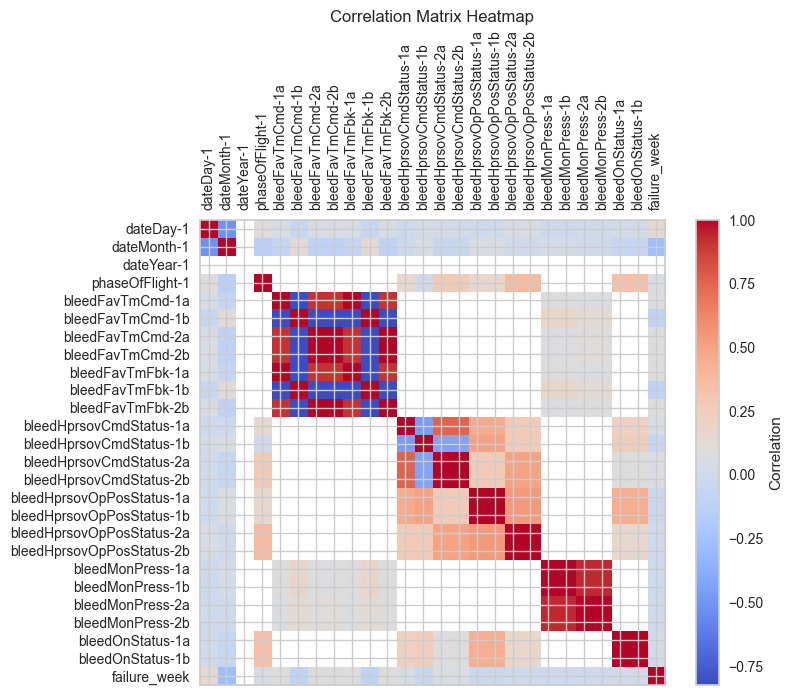

In [13]:
# Plot da matriz de correçaõa com heatmap
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

 Faltou tunar o modelo

In [64]:
# Carregando o profiler para medir a execução dessa célula 
%%time
%%memit

# Finalização do modelo 'catboost' com PyCaret, treinando-o em todo o conjunto de dados disponível.
final_model = finalize_model(catboost)


In [67]:
# Carregando o profiler para medir a execução dessa célula 
%%time
%%memit

# Salva o modelo 'final_model' em disco com o nome 'catboost' usando a função save_model do PyCaret.
save_model(final_model, 'catboost')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['phaseOfFlight-1',
                                              'bleedFavTmCmd-1a',
                                              'bleedFavTmCmd-1b',
                                              'bleedFavTmCmd-2a',
                                              'bleedFavTmCmd-2b',
                                              'bleedFavTmFbk-1a',
                                              'bleedFavTmFbk-1b',
                                              'bleedFavTmFbk-2b',
                                              'bleedHprsovCmdStatus-1a',
                                              'bleedHprsovCmdStatus-1b',
                                              'bleedHprsovCmdStatus-2a',
                                              'bleedHprsovCm...
                                     transformer=SimpleImput

### Carregando o modelo 

Essa etapa é para abrir o modelo com o pycaret e realizar uma predição 

In [69]:
# Importando a biblioteca
from pycaret.classification import load_model

In [68]:
# Carregando o modelo
loaded_model = load_model('catboost')


Transformation Pipeline and Model Successfully Loaded


Definindo o dataframe que é o input do modelo

In [63]:
# Nome das colunas do modelo
column_names = ['phaseOfFlight-1', 'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b',
       'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a',
       'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
       'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
       'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
       'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
       'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'bleedMonPress-1b',
       'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a',
       'bleedOnStatus-1b']

# Input de cada parâmetro 
input_number = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 41, 41, 0, 0]

# Criando o data frame
new_data_df = pd.DataFrame([input_number], columns=column_names)

Nesta última etapa é realizada a predição. 
Caso o resultado seja 1 o resultado é positivo para falha. 

In [71]:
# Resultado da predição
predictions = predict_model(loaded_model, data=new_data_df)
predictions['prediction_score']

0    1.0
Name: prediction_score, dtype: float64

### Medindo a performance do modelo

O código a seguir é utilizado para medir o quanto de memória ram foi gasta e quanto processamento necessário para rodar cada célula

In [73]:
# Carregando o profiler
%load_ext memory_profiler


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [78]:
%%time
%%memit

predictions = predict_model(loaded_model, data=new_data_df)
predictions['prediction_score']


peak memory: 446.99 MiB, increment: 0.02 MiB
CPU times: total: 328 ms
Wall time: 1.87 s


Assim, para realizar uma única previsão na máquina com 16 GB de RAM DDR4 e um processador i5-1145G7, foram necessários 447 MB de memória e gastos 328 ms.